출처 :  
    
> 혼자 공부하는 머신러닝 + 딥러닝,  
    
> https://www.kaggle.com/code/theoviel/starter-code-eda-and-lgbm-baseline

> https://azanewta.tistory.com/3

# **로지스틱 회귀**

In [48]:
# 데이터 불러오기

import pandas as pd
import numpy as np
fish = pd.read_csv('http://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [49]:
# 'Species' 열의 고유값 확인

print(pd.unique(fish['Species'])) # 7가지

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [50]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy() # 'Species'를 제외한 열을 numpy 배열로 변환, fish_input에 저장
fish_input.shape # 크기 확인

(159, 5)

In [51]:
print(fish_input[:5]) # fish_input 0, 1, 2, 3, 4 행 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [52]:
fish_target = fish[['Species']].to_numpy() # 'Species' 열을 넘파이 배열로 변환, fish_target에 저장

In [53]:
from sklearn.model_selection import train_test_split # train data와 test data를 나눠주는 함수
train_input, test_input, train_target, test_target = train_test_split(fish_input,
                                                                      fish_target,
                                                                      random_state = 42)
 # random_state를 지정하면 같은 수를 넣었을 때 항상 같은 test data와 train data를 만든다.

In [54]:
from sklearn.preprocessing import StandardScaler # 데이터를 표준화 전처리 하는 함수(범위 : -2 ~ +2)
ss = StandardScaler()
ss.fit(train_input) # train_input data 표준화 모델 만들기
train_scaled = ss.transform(train_input) # train_input 표준화
test_scaled = ss.transform(test_input) # test_input 표준화

# k-최근접 이웃 분류기(KNN)

In [55]:
from sklearn.neighbors import KNeighborsClassifier # k-최근접 이웃 분류 함수
kn = KNeighborsClassifier(n_neighbors=3) # 'n_neighbors' 파라미터는 확인할 최근접 데이터의 수를 지정
kn.fit(train_scaled, train_target) # KNN 모델링
print(kn.score(train_scaled, train_target)) # 학습된 모델로 train data 예측시 점수
print(kn.score(test_scaled, test_target)) # 학습된 모델로 test data 예측시 점수

# train set을 예측했으때 점수가 더 높은 것을 봤을 때 train data에 과적합된 경향이 있다.

0.8907563025210085
0.85


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [56]:
print(kn.classes_) # 학습된 KNN 모델에 설정 목표값 출력

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [57]:
print(kn.predict(test_scaled[:5]))
 # test data 0, 1, 2, 3, 4 행의 입력 값에 대한 학습된 KNN 모델의 예측 값

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [58]:
print(test_target[:5]) # 실제 test data 목표 값

[['Perch']
 ['Smelt']
 ['Pike']
 ['Whitefish']
 ['Perch']]


In [68]:
proba = kn.predict_proba(test_scaled[:5]) # 최근접 데이터의 각 클레스에 대한 확률
print(np.round(proba, decimals=4)) # 소수점 4째 자리까지 출력

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [70]:
destances, indexes = kn.kneighbors(test_scaled[3:4]) # test_scaled[3]와 최근접 데이터 간에 거리, 최근접 데이터의 인덱스 저장
print(train_target[indexes]) # 최근접 데이터 인덱스 출력

[[['Roach']
  ['Perch']
  ['Perch']]]


# 혼합 행렬(Confusion Matrix)를 통해 실제 값과 예측 값 비교

\< Check \>
> np.newaxis 함수는 차원을 늘려서 표현해줍니다.

    x = np.arange(6)
    y = np.arange(3)
    x2 = x[:,np.newaxis]

    print(x.shape, y.shape) # (6,) (3,)
    print(x[:,np.newaxis].shape)  # (6, 1)

    print(x + y) # ValueError: operands could not be broadcast together with shapes (6,) (3,)
    print(x2 + y) # [[0 1 2] [1 2 3] [2 3 4] [3 4 5] [4 5 6] [5 6 7]]

    

In [37]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] ####### check~
    fmt = '.2f' if normalize else 'd'

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=15)
    plt.colorbar()
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = (cm.max()+cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size=12)
    plt.xlabel('Predicted label', size=12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


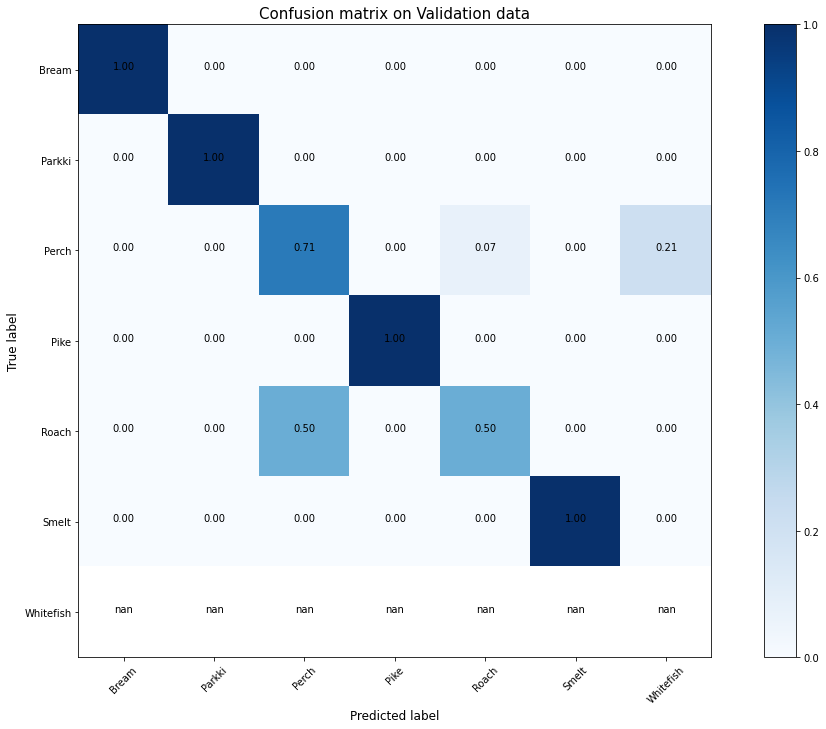

In [44]:
from sklearn.metrics import confusion_matrix, log_loss
import matplotlib.pyplot as plt
import itertools
kn_val = kn.predict(test_scaled)
conf_mat_val = confusion_matrix(kn_val, test_target)
'''
array([[11,  0,  0,  0,  0,  0,  0],  # 실제 target 값이 'Bream'인 데이터가 11개 있고 모두 바르게 예측되었다.
       [ 0,  2,  0,  0,  0,  0,  0],  # 실제 target 값이 'Parkki'인 데이터가 2개 있고 모두 바르게 예측되었다.
       [ 0,  0, 10,  0,  1,  0,  3],  # 실제 target 값이 'Perch'인 데이터가 14개 있고 10개는 바르게,
                                         1개는 'Roach'로, 3개는 'Whitefish'로 예측 되었다.
       [ 0,  0,  0,  4,  0,  0,  0],  # 실제 target 값이 'Pike'인 데이터가 4개 있고 모두 바르게 예측되었다.
       [ 0,  0,  2,  0,  2,  0,  0],  # 실제 target 값이 'Roach'인 데이터가 4개 있고 2개는 바르게,
                                        2개는 'Perch'로 예측되었다.
       [ 0,  0,  0,  0,  0,  5,  0],  # 실제 target 값이 'Smelt'인 데이터가 모두 바르게 예측되었다.
       [ 0,  0,  0,  0,  0,  0,  0]]) # 실제 target 값이 'Whitefish'인 데이터는 없었다.
'''
plot_confusion_matrix(conf_mat_val, ['Bream' ,'Parkki', 'Perch', 'Pike', 'Roach',
                                     'Smelt', 'Whitefish'],
                       title='Confusion matrix on Validation data',
                       normalize=True)

# 로지스틱 회귀

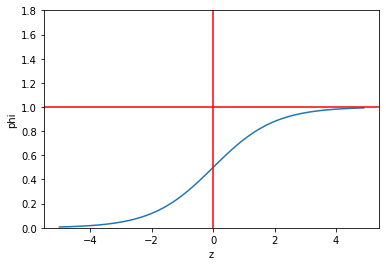

In [80]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5, 0.1)
phi = 1/ (1+np.exp(-z)) # 시그모이드 함수
plt.plot(z, phi) # 메인선 생성
plt.axhline(y=1, color='r') # 가로선 생성
plt.axvline(x=0, color='r') # 새로선 생성
plt.ylim(0,1.8) # y 축 길이 설정
plt.xlabel('z') # x 축 이름
plt.ylabel('phi') # y 축 이름
plt.show()